# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [14]:
#seu código aqui
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

print('Quantidde de linhas e colunas da base de treino',X_train.shape, y_train.shape)
print('Quantidde de linhas e colunas da base de teste',X_test.shape, y_test.shape)

y_train.value_counts()

#Aqui confirmo que nossa base de treino esta balanceada.

#Aqui confirmo que que a base de treino X esta correta e não possui a coluna do nosso alvo.


Quantidde de linhas e colunas da base de treino (261, 10) (261, 1)
Quantidde de linhas e colunas da base de teste (32, 10) (32, 1)


Credit_Score
High            87
Low             87
Medium          87
Name: count, dtype: int64

In [15]:
y_train.info(), X_train.info()

#Aqui confirmo que a base treino do nosso alvo está isolado corretamente. 
#Confirmo também que tem o mesmo numero de linhas e dados 261 nas duas bases de treino.
#Verifico também que a base de treino do eixo X esta com o nosso alvo devidamente excluido.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Credit_Score  261 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            261 non-null    float64
 1   Income                         261 non-null    float64
 2   Number of Children             261 non-null    int64  
 3   Gender_Male                    261 non-null    bool   
 4   Education_Bachelor's Degree    261 non-null    bool   
 5   Education_Doctorate            261 non-null    bool   
 6   Education_High School Diploma  261 non-null    bool   
 7   Education_Master's Degree      261 non-null    bool   
 8   Marital Status_Singl

(None, None)

In [16]:
X_test.info(), y_test.info()

#Base de teste confirmado, possui todas as variaveis desejadas e o alvo esta isolado.
#Aqui confirmo que possui o mesmo numero de linhas e dados, e o alvo esta devidamente isolado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            32 non-null     float64
 1   Income                         32 non-null     float64
 2   Number of Children             32 non-null     int64  
 3   Gender_Male                    32 non-null     bool   
 4   Education_Bachelor's Degree    32 non-null     bool   
 5   Education_Doctorate            32 non-null     bool   
 6   Education_High School Diploma  32 non-null     bool   
 7   Education_Master's Degree      32 non-null     bool   
 8   Marital Status_Single          32 non-null     bool   
 9   Home Ownership_Rented          32 non-null     bool   
dtypes: bool(7), float64(2), int64(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 1 columns):
 #   Column     

(None, None)

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

In [17]:
#Sua resposta aqui: 1° Vamos preparar os dados, 2° Criação e treinamento da arvore de decisão, 3° avaliação do modelo. 
# Podemos melhorar o modelo ajustando alguns filtros como, profundidade, ajustar as variavéis e outros ajustes.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [18]:
#seu código aqui
arvore = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Relatório de Classificação:
Acuracia: 0.9375
Recall: 0.9682539682539683
              precision    recall  f1-score   support

        High       1.00      0.90      0.95        21
         Low       1.00      1.00      1.00         3
      Medium       0.80      1.00      0.89         8

    accuracy                           0.94        32
   macro avg       0.93      0.97      0.95        32
weighted avg       0.95      0.94      0.94        32



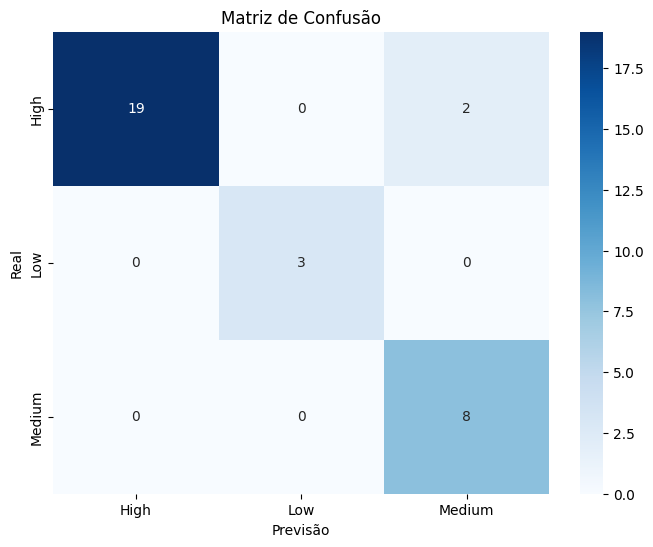

In [19]:
#seu código aqui
previsao = arvore.predict(X_test)
acuracia = accuracy_score(y_test, previsao)
relatorio = classification_report(y_test, previsao)
rec = recall_score(y_test, previsao, average='macro')

print("Relatório de Classificação:")
print("Acuracia:",acuracia)
print('Recall:',rec)
print(relatorio)

matriz_confusao = confusion_matrix(y_test, previsao)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

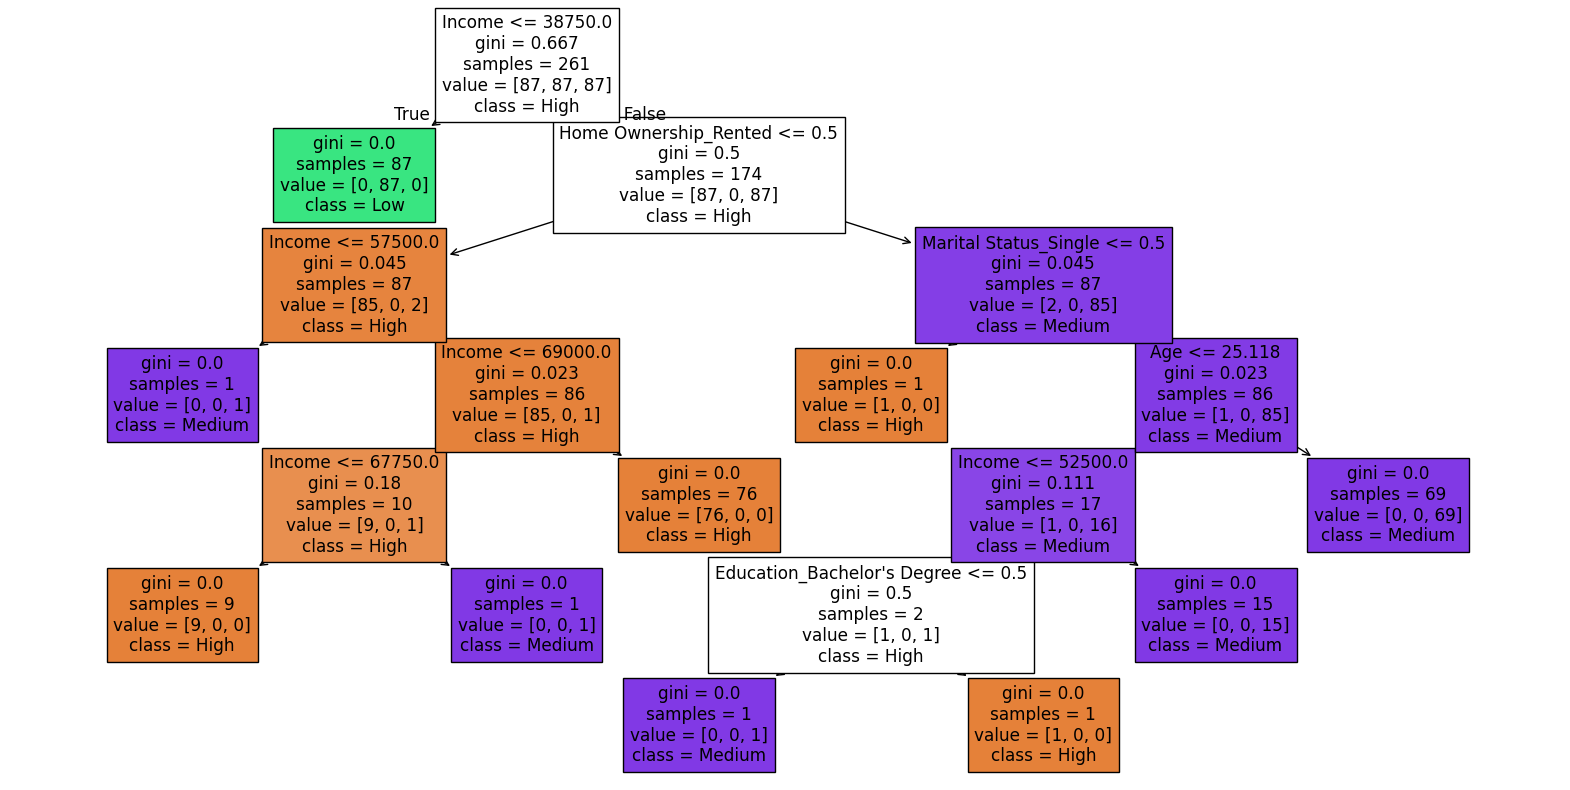

In [20]:
#seu código aqui
plt.figure(figsize=(20,10))
plot_tree(arvore, filled=True, feature_names=X_train.columns, class_names=['High','Low','Medium'])
plt.show()

**Resposta 5** - Profundidade da arvoré tem 3 niveis

# 6) Identifique as 2 principais features do modelo.


**Resposta)** - Income e Home Ownership_Rented são as principais features do modelo.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [21]:
#seu código aqui

X_train_menor =  X_train[['Income','Home Ownership_Rented']]
X_test_menor = X_test[['Income','Home Ownership_Rented']]

arvore_menor = DecisionTreeClassifier(criterion='gini', random_state= 0) 
arvore_menor.fit(X_train_menor,y_train)




DecisionTreeClassifier(random_state=0)

Acuracia Filtrada: 0.90625
Acuracia: 0.9375
Recall Filtrado (treino): 0.9007936507936508
Recall (treino): 0.9682539682539683
Relatório de Classificação Filtrado:
              precision    recall  f1-score   support

        High       0.91      0.95      0.93        21
         Low       1.00      1.00      1.00         3
      Medium       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.92      0.90      0.91        32
weighted avg       0.90      0.91      0.90        32

Relatório de Classificação:
              precision    recall  f1-score   support

        High       1.00      0.90      0.95        21
         Low       1.00      1.00      1.00         3
      Medium       0.80      1.00      0.89         8

    accuracy                           0.94        32
   macro avg       0.93      0.97      0.95        32
weighted avg       0.95      0.94      0.94        32



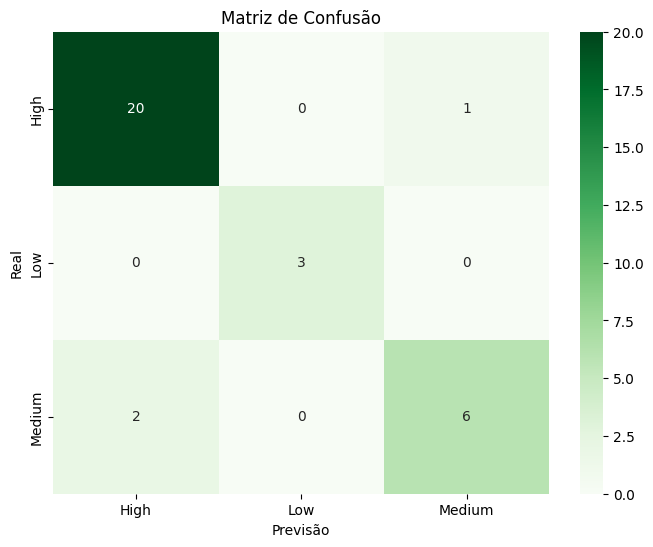

In [ ]:

previsao_menor = arvore_menor.predict(X_test_menor) #Respondeu o Alvo Credit Score com suas classificações, High, Low, Medium 
acuracia_menor = accuracy_score(y_test, previsao_menor) #Comparou as respotas prevista pelo modelo com as respotas verdadeiras
print("Acuracia Filtrada:",acuracia_menor)
print("Acuracia:",acuracia)

rec = recall_score(y_test, previsao_menor, average="macro") #
print("Recall Filtrado (treino):", rec)

rec1 = recall_score(y_test, previsao, average="macro")
print("Recall (treino):", rec1)

relatorio_menor = classification_report(y_test, previsao_menor)
print("Relatório de Classificação Filtrado:")
print(relatorio_menor)
print("Relatório de Classificação:")
print(relatorio)

matriz_confusao_menor = confusion_matrix(y_test, previsao_menor)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_menor, annot=True, cmap='Greens', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

**Resposta** - O modelo com apenas as 2 features principais apresentou piores resultados, ou seja, o modelo anterior é melhor.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [23]:
#Seu texto aqui
#Resultado do Naive Bayes- Acuracia - 0,9375 Recall - 0.968
#O Modelo Naive Bayes se mostrou muito eficiente e obtem resultados muitos semlehante ao 1° modelo de árvore de decisão.